<h1> Assignment 7 for CS 603</h1>

<h3>Mohamed Fazmi Ahamed Fizer </h3>
<h3>Hari Charan Kaveri </h3>
<h3>Tharinda Embuldeniya </h3>



real estate transaction .csv file. 

1) With Hierarchical Indexing, rearrange the data to create a first dataframe which will have first level of index of city, second level of index of zip, first level of column of type, second level of column of sq_ft and price, please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data. Do some plotting to reflect this new dataframe.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_csv = pd.read_csv ("Sacramentorealestatetransactions.csv")

In [146]:
df_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


first level of index of city, second level of index of zip,

In [147]:
df2 = df_csv.set_index (["city", 'zip'])
df2.sort_index(inplace=True)
df2.head()

street state  beds  baths  sq__ft         type  \
city     zip                                                                 
ANTELOPE 95843  3828 BLACKFOOT WAY    CA     3      2    1088  Residential   
         95843  5708 RIDGEPOINT DR    CA     2      2    1043  Residential   
         95843  4844 CLYDEBANK WAY    CA     3      2    1215  Residential   
         95843      7895 CABER WAY    CA     3      2    1362  Residential   
         95843  7837 ABBINGTON WAY    CA     4      2    1830  Residential   

                                   sale_date   price   latitude   longitude  
city     zip                                                                 
ANTELOPE 95843  Wed May 21 00:00:00 EDT 2008  126640  38.709740 -121.373770  
         95843  Wed May 21 00:00:00 EDT 2008  161250  38.720270 -121.331555  
         95843  Wed May 21 00:00:00 EDT 2008  182716  38.714609 -121.347887  
         95843  Wed May 21 00:00:00 EDT 2008  194818  38.711279 -121.393449  
         95843  Wed May 21 00:00:00 EDT 2008  387731  38.709873 -121.339472

In [148]:
df3 = pd.DataFrame({"type": df2.loc[:,"type"],"sq__ft": df2.loc[:,"sq__ft"],"price": df2.loc[:,"price"]} )

In [149]:
df3['price/sq_ft'] = df3['sq__ft']/df3['price']
df3.head(8)

type  sq__ft   price  price/sq_ft
city     zip                                            
ANTELOPE 95843  Residential    1088  126640     0.008591
         95843  Residential    1043  161250     0.006468
         95843  Residential    1215  182716     0.006650
         95843  Residential    1362  194818     0.006991
         95843  Residential    1830  387731     0.004720
         95843  Residential    1392  165000     0.008436
         95843  Residential    1007  180000     0.005594
         95843  Residential    1393  200000     0.006965

Do some plotting to reflect this new dataframe.

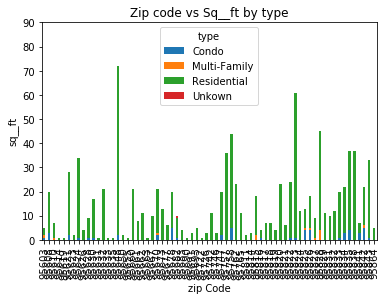

In [150]:
df3.groupby(['zip','type'])['sq__ft'].size().unstack().plot(kind='bar',stacked=True)
plt.ylabel('sq__ft')
plt.xlabel('zip Code')
plt.title('Zip code vs Sq__ft by type')
plt.yticks(np.arange(0, 100, 10))
plt.show()

Try stack and unstack with the above created dataframe. Display the first eight rows of data.

In [151]:
stacked = df3.stack()
stacked

city             zip               
ANTELOPE         95843  type           Residential
                        sq__ft                1088
                        price               126640
                        price/sq_ft     0.00859128
                        type           Residential
                        sq__ft                1043
                        price               161250
                        price/sq_ft     0.00646822
                        type           Residential
                        sq__ft                1215
                        price               182716
                        price/sq_ft     0.00664966
                        type           Residential
                        sq__ft                1362
                        price               194818
                        price/sq_ft     0.00699114
                        type           Residential
                        sq__ft                1830
                        price               38

In [152]:
#Transform Stacked to Unstacked 

In [153]:
tuples = stacked.index.tolist()
index_values = [(t[0],t[1]) for t in tuples if t[2] == 'type']

index = pd.MultiIndex.from_tuples(index_values, names=['city', 'zip_code'])
df4 = pd.DataFrame(stacked.values.reshape(len(df3),4), index=index, columns=['type', 'sq__ft', 'price', 'price/sq_ft'])

df4

type sq__ft   price price/sq_ft
city            zip_code                                        
ANTELOPE        95843     Residential   1088  126640  0.00859128
                95843     Residential   1043  161250  0.00646822
                95843     Residential   1215  182716  0.00664966
                95843     Residential   1362  194818  0.00699114
                95843     Residential   1830  387731  0.00471977
                95843     Residential   1392  165000  0.00843636
                95843     Residential   1007  180000  0.00559444
                95843     Residential   1393  200000    0.006965
                95843     Residential   1574  255000  0.00617255
                95843     Residential   1567  261000  0.00600383
                95843     Residential   1768  265000   0.0066717
                95843           Condo    836  115000  0.00726957
                95843     Residential    988  223139  0.00442773
                95843     Residential   2026  231200  0.00876298
                95843     Residential   1187  234000  0.00507265
                95843     Residential   2652  239700   0.0110638
                95843     Residential   1830  254172  0.00719985
                95843     Residential   2346  320000  0.00733125
                95843     Residential   2347  325000  0.00722154
                95843     Residential   2085  408431   0.0051049
                95843     Residential   1711  161500   0.0105944
                95843     Residential   1669  168750  0.00989037
                95843     Residential   1479  205000  0.00721463
                95843     Residential   1953  207744  0.00940099
                95843     Residential   1915  240000  0.00797917
                95843     Residential   1235  246544  0.00500925
                95843     Residential   2504  246750   0.0101479
                95843     Residential   2160  290000  0.00744828
                95843     Residential   3134  315000  0.00994921
                95843     Residential   2960  350000  0.00845714
...                               ...    ...     ...         ...
SACRAMENTO      95842           Condo    840   40000       0.021
                95842           Condo    795   82732  0.00960934
                95842     Residential    964   97500  0.00988718
                95842     Residential   1159  170000  0.00681765
                95842     Residential   1009  198000  0.00509596
                95842     Residential   1292  105000   0.0123048
                95842     Residential   1127  124000  0.00908871
                95842     Residential    960  155000  0.00619355
                95842     Residential   1712  168000   0.0101905
                95842     Residential   1578  195000  0.00809231
                95842           Condo    933   62000   0.0150484
                95842           Condo    924  150454  0.00614141
                95842     Residential   1968  205000      0.0096
                95842     Residential   1627  223000  0.00729596
                95864     Residential   2325  660000  0.00352273
                95864     Residential   1643   99000    0.016596
                95864     Residential    930  203000  0.00458128
                95864     Residential   1360  315000  0.00431746
                95864     Residential   1348  545000  0.00247339
SHINGLE SPRINGS 95682          Unkown      0  275000           0
SLOUGHHOUSE     95683     Residential   5822    2000       2.911
WALNUT GROVE    95690     Residential   1727  380000  0.00454474
WEST SACRAMENTO 95691     Residential    884  147000  0.00601361
                95691     Residential      0  165000           0
                95691     Residential      0  200100           0
WILTON          95693     Residential   2110  372000  0.00567204
                95693     Residential      0  560000           0
                95693     Residential   3741  579093   0.0064601
                95693     Residential   3788  691659  0.00547669
   

<b><i>1st Attempt trying to recontruct column and index levels</b></u>

In [154]:
df = pd.read_csv  ("Sacramentorealestatetransactions.csv", index_col = [0,1],usecols = ["city","zip","sq__ft","type","price"])

In [155]:
df.sort_index(inplace=True)

In [156]:
price = df['price'].tolist()
types = df['type'].tolist()
sq_ft = df['sq__ft'].tolist()

In [157]:
tuples = list(zip(*[sq_ft, types,price]))

In [158]:
index= pd.MultiIndex.from_tuples(tuples)
#df= pd.DataFrame(df, columns=index)

In [159]:
indexes = pd.MultiIndex.from_tuples(index)
typecodes = indexes.codes[1]
pricePersqft = df3.as_matrix(columns=df3.columns[3:])

ArraySize = len(typecodes)

Complete = [];
for i in range(len(typecodes)):
    arr = [None] * 4
    int_typecode = int(typecodes[i])
    value = pricePersqft[i]
    arr[int_typecode] = value[0];

    Complete.append(arr)

    

/Users/techyouknow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
header = pd.MultiIndex.from_product([['price/sq_ft'],indexes.levels[1]])

#index_col = pd.DataFrame(df3.index.tolist(), columns=['city','zip_code'])
#df5 = pd.DataFrame(Complete, columns=header, index=index_col)

index = pd.MultiIndex.from_tuples(df3.index.tolist(), names=['city', 'zip_code'])
df5 = pd.DataFrame(Complete, index=index, columns=header)


df5.head(8)

price/sq_ft                                
                        Condo Multi-Family Residential Unkown
city     zip_code                                            
ANTELOPE 95843            NaN          NaN    0.008591    NaN
         95843            NaN          NaN    0.006468    NaN
         95843            NaN          NaN    0.006650    NaN
         95843            NaN          NaN    0.006991    NaN
         95843            NaN          NaN    0.004720    NaN
         95843            NaN          NaN    0.008436    NaN
         95843            NaN          NaN    0.005594    NaN
         95843            NaN          NaN    0.006965    NaN

In [161]:
arrays = [['type'],['sq__ft','price']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['Type', 'Sq_ft\Price'])
df5 = pd.DataFrame(df3, columns=index)
df5.head(8)

Type             type
Sq_ft\Price    sq__ft
city     zip         
ANTELOPE 95843    NaN
         95843    NaN
         95843    NaN
         95843    NaN
         95843    NaN
         95843    NaN
         95843    NaN
         95843    NaN

<b><i>2nd Attempt trying to recontruct column and index levels</b></u>

In [162]:
df = pd.read_csv  ("Sacramentorealestatetransactions.csv", index_col = [1,2])

In [163]:
df.sort_index(inplace=True)
df.head()
price = df['price'].tolist()
types = df['type'].tolist()
sq_ft = df['sq__ft'].tolist()

In [164]:
#tuples = list(zip(*([types])))
#tuples = list(zip(*[sq_ft,price]))

In [165]:
tuples = list(zip(*[sq_ft, types,price]))

In [166]:
df.index.names = ['City', 'Zip Code']

In [167]:
col= pd.MultiIndex.from_tuples(tuples ,names = ["Type", "Sq_FT", "Price"])
df= pd.DataFrame(df ,columns=col )

In [168]:
df.head(8)

Type                     1088        1043        1215        1362        1830  \
Sq_FT             Residential Residential Residential Residential Residential   
Price                  126640      161250      182716      194818      387731   
City     Zip Code                                                               
ANTELOPE 95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   

Type                     1392        1007        1393        1574        1567  \
Sq_FT             Residential Residential Residential Residential Residential   
Price                  165000      180000      200000      255000      261000   
City     Zip Code                                                               
ANTELOPE 95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   
         95843            NaN         NaN         NaN         NaN         NaN   

Type               ...        5822        1727        884         0            \
Sq_FT              ... Residential Residential Residential Residential          
Price              ...      2000        380000      147000      165000 200100   
City     Zip Code  ...                                                          
ANTELOPE 95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   
         95843     ...         NaN         NaN         NaN         NaN    NaN   

Type                     2110        0           3741        3788        4400  
Sq_FT             Residential Residential Residential Residential Residential  
Price                  372000      560000      579093      691659      884790  
City     Zip Code                                                              
ANTELOPE 95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  
         95843            NaN         NaN         NaN         NaN         NaN  

[8 rows x 985 columns]

2) With Hierarchical Indexing, rearrange the data to create a second dataframe which will have first level of index of city, second level of index of zip, columns of bed, bath and sale_date. Please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data.

In [169]:
df_csv = pd.read_csv ("Sacramentorealestatetransactions.csv", usecols=["city","zip","beds","baths","sale_date"])

df8 = df_csv.set_index (["city", 'zip'])
df8.sort_index(inplace=True)

df8.index.names = ['City', 'Zip Code']
df8.columns = ["No Of Beds", "No Of Baths", "Sale_Date"]

df8.head(8)


No Of Beds  No Of Baths                     Sale_Date
City     Zip Code                                                       
ANTELOPE 95843              3            2  Wed May 21 00:00:00 EDT 2008
         95843              2            2  Wed May 21 00:00:00 EDT 2008
         95843              3            2  Wed May 21 00:00:00 EDT 2008
         95843              3            2  Wed May 21 00:00:00 EDT 2008
         95843              4            2  Wed May 21 00:00:00 EDT 2008
         95843              3            2  Tue May 20 00:00:00 EDT 2008
         95843              2            2  Tue May 20 00:00:00 EDT 2008
         95843              3            2  Tue May 20 00:00:00 EDT 2008

3)Reshape the above two newly created dataframes and merge them.

In [170]:
pd.merge(df, df8, on=['City', "Zip Code"])

(1088, Residential, 126640)  \
City            Zip Code                                
ANTELOPE        95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
...                                               ...   
WEST SACRAMENTO 95691                             NaN   
                95691                             NaN   
                95691                             NaN   
                95691                             NaN   
                95691                             NaN   
WILTON          95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   
                95693                             NaN   

                          (1043, Residential, 161250)  \
City            Zip Code                                
ANTELOPE        95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843                             NaN   
                95843              